<hr style="height: 1px;">
<i>This code was authored by Alex Shvonski, Copyright 2020 MIT All Rights Reserved.</i>
<hr style="height: 1px;">

<h2>Initializing the program</h2>

<font size="3">To initialize the visualization, you may need to click "Run all initialization cells" above (see button location in figure).</font>

<img src="img/binder_initialize_button.png" alt="Drawing" style="width: 700px;" align="left"/>

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<font size="3">You should see the visualization <i>directly below this line</i>, before the next section.</font>

<br/>
<br/>
<hr style="height: 1px;">

In [11]:
#This code was authored by Alex Shvonski, Copyright 2020 MIT All Rights Reserved.

%matplotlib notebook
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, interactive, interactive_output, fixed, IntSlider, HBox, Layout, Output, VBox
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import pi
import warnings
warnings.filterwarnings("ignore")

In [12]:
#Define functions
###############################################
###############################################
# def amplitude_x(x,t0):
#     L=1.
#     #w=2.
#     k=1.
#     f = np.zeros(len(x))
#     for i in range(len(x)):
#         x_i = x[i]
#         #arg = k*x_i - w*t0
#         arg = k*x_i
#         if arg < 0.:
#             f[i] = 0.
#         elif 0. <= arg <= 2.*L/3.:
#             f[i] = 1.
#         elif arg > 2.*L/3.:
#             f[i] = 0.
#     return f

def amplitude_x(x,t0):
    #result = np.sin(x-direction*t0)
    result = np.exp(-2.*((x-0)-t0)**2.)
    return result

def w_dispersion(k,a):
    #we are solving for vp given w(k)
    #vp=w(k)/k
    #w(k)=k*v1*np.sqrt(1+a*k^2)
    #a1=a*1e-1
    a1=a
    v1=1.
    w = k*v1*np.sqrt(1.+a1*k**2.)
    vp=w/k
    Jacobian_k = v1*np.sqrt(1.+a1*k**2.) + (k**2)*a1*v1/np.sqrt(1.+a1*k**2.)
    return w, Jacobian_k

In [13]:
#Define functions
###############################################
###############################################
def fourier_integrand_k(k,x,t0,a):
    L=1.
    #k=k_dispersion(w)
    w, Jacobian_k = w_dispersion(k,a)
    c_w = np.sqrt(1./(8.*pi))*np.exp(-0.5*(w/2.)**2.)
    
    result = Jacobian_k*c_w*np.exp(1j*(k*(x-0)))*np.exp(-1j*(w*t0))
    return result.real

def fourier_integral(x0,t0,a):
    #result = quad(fourier_integrand_w, -np.inf, np.inf, args=(x0,t0))[0]
    result = quad(fourier_integrand_k, -5., 5., args=(x0,t0,a))[0]
    return result.real

def fourier_waveform(x,t0,a):
    fw = np.zeros(len(x))
    for i in range(len(x)):
        x_i = x[i]
        fw[i] = fourier_integral(x_i,t0,a)
    return fw

<IPython.core.display.Javascript object>


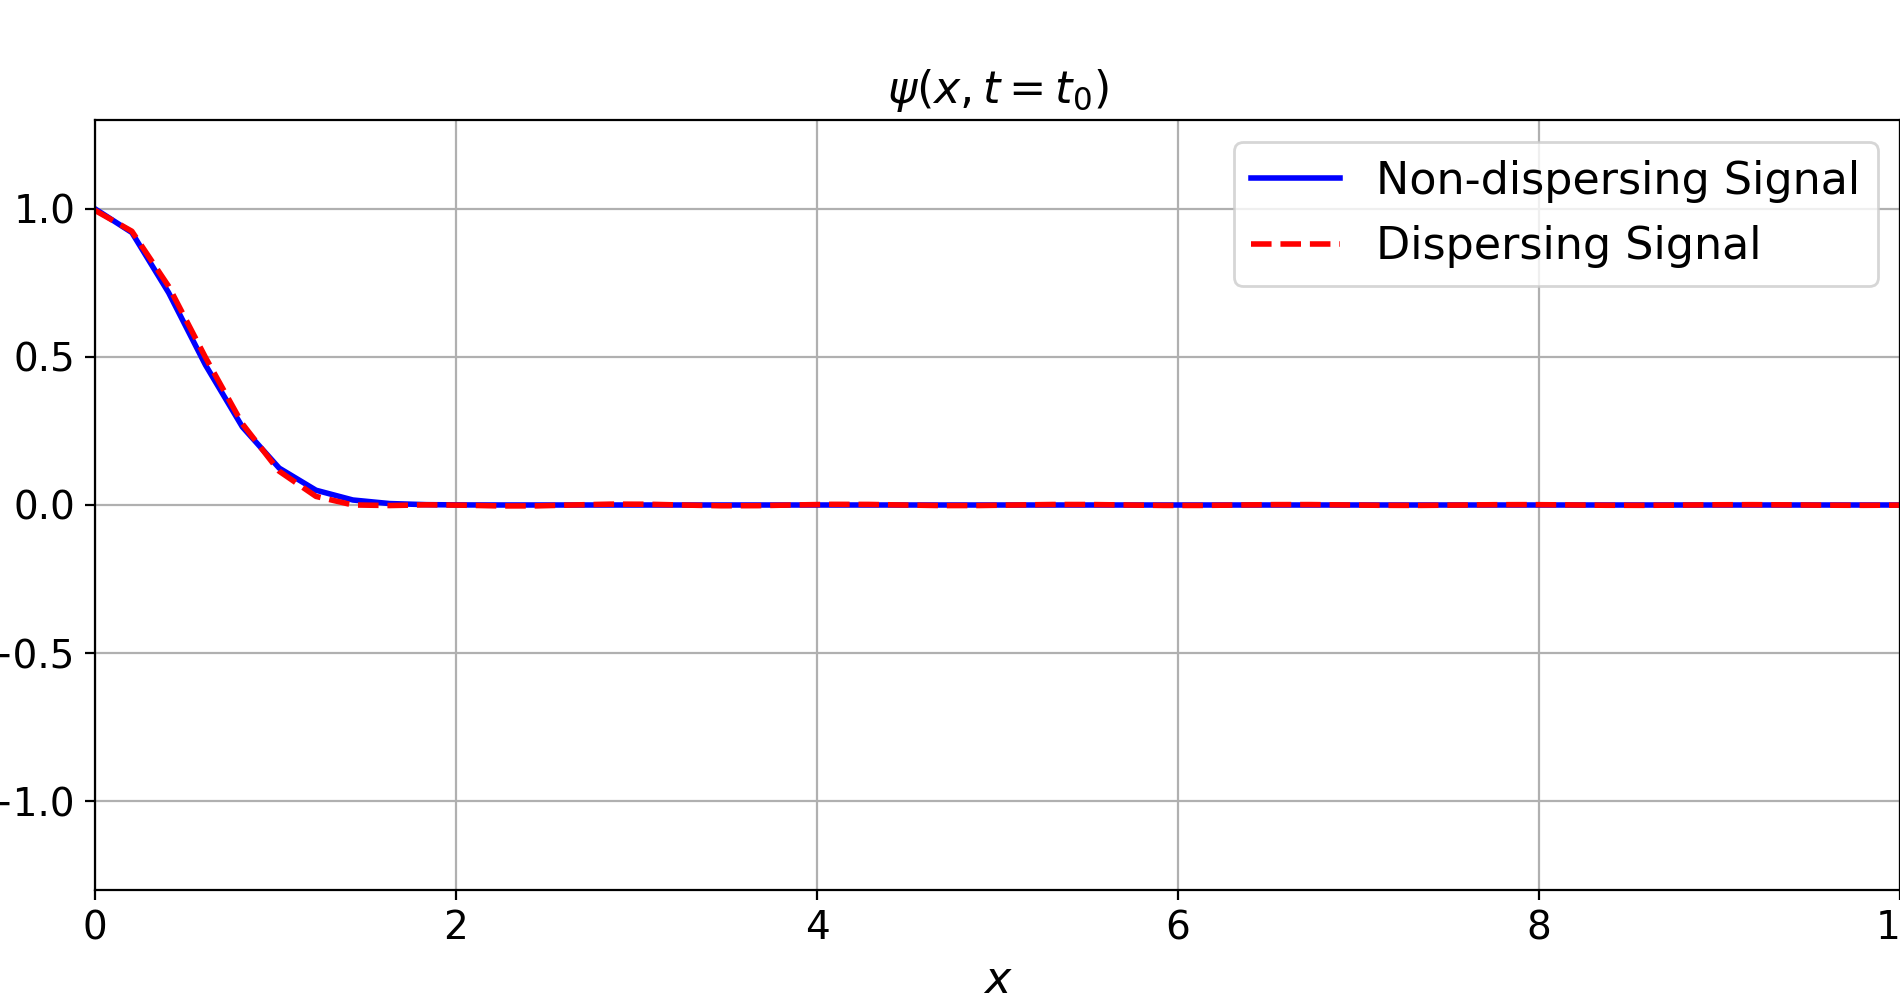

In [14]:
#Define plot
###############################################
###############################################
fig, ax = plt.subplots(1, 1, figsize=(9.5, 5))
plt.subplots_adjust(left=0.05, bottom=None, right=1, top=None, wspace=None, hspace=1.)
x = np.linspace(0., 10., 50)
t0=0
a=0


#############################
#plot1
y_max = 1.3

line_1, = ax.plot(x, amplitude_x(x,t0), 'b-', lw=2, label='Non-dispersing Signal')

line_2, = ax.plot(x, fourier_waveform(x,t0,a), 'r--', lw=2, label='Dispersing Signal')


#plot params
ax.set_title('$\psi(x,t=t_0)$', fontsize=16)
ax.set_xlabel('$x$', fontsize=16)
ax.set_xlim(min(x),max(x))
ax.set_ylim(-y_max,y_max)
ax.grid(True)
ax.legend(loc=1, fontsize=16)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)


#Define plot updater
###############################################
###############################################
def update(t0, a):
    #plot1
    #############################
    line_1.set_ydata(amplitude_x(x,t0))
    line_2.set_ydata(fourier_waveform(x,t0,a))
    
    fig.canvas.draw_idle()
    return


#Define control elements
###############################################
###############################################
s1=widgets.FloatSlider(
    min=0.,
    max=10.,
    step=0.2,
    value=0.,
    layout=Layout(width='500px'),
    description='$t_0$',
    style = {'description_width': 'initial'})

s2=widgets.FloatSlider(
    min=0.,
    max=0.1,
    step=0.01,
    value=0.01,
    layout=Layout(width='500px'),
    description='$a$',
    style = {'description_width': 'initial'})

#Connect controls to plot
###############################################
###############################################
out = interactive_output(update, {'t0': s1,'a': s2})


#Set layout
###############################################
###############################################
box_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')


#Display output
###############################################
###############################################
display(VBox([s1,s2], layout=box_layout))

<hr style="height: 1px;">

<h2>About the Visualization</h2>

<font size="3"><b>Plot:</b> <i>Amplitude</i> of a traveling gaussian signal as a function of position and time. The case of a dispersive medium is compared to non-dispersive medium, where the dispersion parameter $a$ can be varied. The dispersion has the following form:

$$\omega(k)=vk\sqrt{1+ak^2}$$

</font>

<br/>
<font size="3"><b>Sliders:</b>
<ul>
    <li>$t_{0}$: vary time and observe the waveforms as they travel to the right</li>
    <li>$a$: vary the dispersion parameter from $a=0$ to $a=0.1$</li>
</ul>
</font>

<br/>
<hr style="height: 1px;">

<h2>Exploration</h2>

<font size="3">Consider the following questions and possible actions:
<ul>
    <li>For fixed dispersion parameter $a$, observe how the signal disperses as function of time.</li>
    <li>For fixed time, observe how different values of $a$ affect the spread of the signal.</li>
</ul>      
</font>

<br/>

<hr style="height: 1px;">

<h2>Viewing the Code</h2>
<br/>
<font size="3">You are encouraged to click the button below to view the source code. You can alter the code and rerun it within this notebook, or download the notebook itself and run the code locally on your own machine.</font>

In [15]:
#The code in this block includes content from StackOverFlow User: harshil (CC BY-SA 4.0)
#and can be found here: https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
###############################################
###############################################
#Enable hidden code
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
